In [92]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)


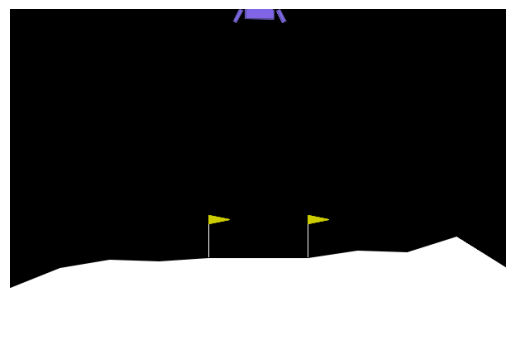

(400, 600, 3)


In [93]:
env = gym.make("LunarLander-v3", render_mode = "rgb_array")
print(env.observation_space)
env.reset()
frame = env.render()
plt.imshow(frame)
plt.axis('off')
plt.show()

env.close()
print(frame.shape)
# print(state)

0
False


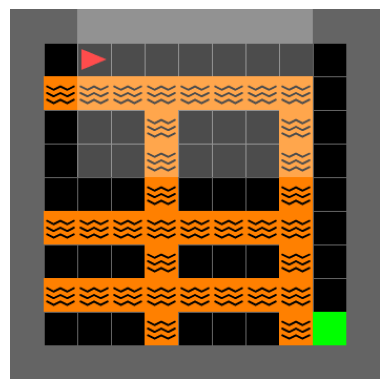

(7, 7, 3)


In [94]:
import gymnasium as gym
import minigrid
import matplotlib.pyplot as plt
from minigrid.wrappers import RGBImgPartialObsWrapper, ImgObsWrapper


env = gym.make("MiniGrid-LavaCrossingS11N5-v0", render_mode = 'rgb_array')

state, _ = env.reset()
next_state, reward, done, info, _ = env.step(2)
print(reward)
print(info)
frame = env.render()
plt.imshow(frame)
plt.axis('off') 
plt.show()
print(state['image'].shape)


In [95]:
import gymnasium as gym
from minigrid.wrappers import FlatObsWrapper, RGBImgPartialObsWrapper, ImgObsWrapper, FullyObsWrapper
import torch.nn as nn
import torch
import torchvision

env = gym.make('MiniGrid-Empty-8x8-v0')
# env = FlatObsWrapper(env)
# env = RGBImgPartialObsWrapper(env) # Get pixel observations
# env = ImgObsWrapper(env) # Get rid of the 'mission' field
obs, _ = env.reset() # This now produces an RGB tensor only
print(obs.observation_space.shape[0])




AttributeError: 'dict' object has no attribute 'observation_space'

In [ ]:
env = gym.make("MiniGrid-LavaCrossingS11N5-v0")
env = ImgObsWrapper(env)
obs, _ = env.reset()
# print(obs['mission'][:10])

print(env.observation_space.shape[2])




3


In [ ]:
env.reset()
action = env.action_space.sample()
obs, reward, terminated, truncated, info  = env.step(action)

print("Action:", action)
print("Observation:", obs)
print("Reward:", reward)
print("Terminated:", terminated)
print("Truncated:", truncated)
print("Info:", info)

Action: 0
Observation: {'image': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [2, 5, 0],
        [2, 5, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [2, 5, 0],
        [1, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [2, 5, 0],
        [9, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [2, 5, 0],
        [1, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [2, 5, 0],
        [9, 0, 0]]], dtype=uint8), 'directi

In [ ]:
import gymnasium as gym
from minigrid.wrappers import PositionBonus
import matplotlib as plt
env = gym.make("MiniGrid-Empty-5x5-v0")
_, _ = env.reset(seed=0)
_, reward, _, _, _ = env.step(1)
print(reward)

0


In [12]:
env_bonus = PositionBonus(env)
obs, _ = env_bonus.reset(seed=0)
obs, reward, terminated, truncated, info = env_bonus.step(1)
before_img = env.render()
plt.imshow(before_img)
print(reward)

NameError: name 'plt' is not defined

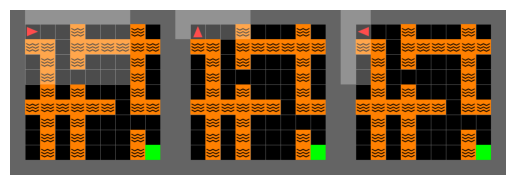

In [ ]:
env = gym.make("MiniGrid-LavaCrossingS11N5-v0", render_mode = 'rgb_array')

env.reset()

before_img = env.render()
plt.imshow(before_img)

# action = env.actions.forward
obs, reward, terminated, truncated, info  = env.step(action)

after_img = env.render()

# action = env.actions.forward
obs, reward, terminated, truncated, info  = env.step(action)

final_img = env.render()

plt.imshow(np.concatenate([before_img, after_img, final_img], 1));
plt.axis('off')
plt.show()

In [ ]:
from torchvision import transforms
env = gym.make("MiniGrid-LavaCrossingS11N5-v0")

# Chuyển đổi ảnh từ PIL thành tensor và chuẩn hóa
transform = transforms.Compose([
    transforms.ToTensor(),  # Chuyển đổi từ PIL Image sang tensor (kích thước [C, H, W])
])

# Hàm lấy ảnh từ môi trường và chuẩn hóa
def get_image_from_env(env):
    image = env.render(mode='rgb_array')  # Lấy ảnh với mode 'rgb_array'
    image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Chuyển thành tensor và chuẩn hóa
    return image

# Ví dụ sử dụng
state, _ = env.reset()  # Lấy trạng thái ban đầu
state_image = torch.FloatTensor(state['image']).permute(2, 0, 1)
print(state_image.shape)  # In kích thước tensor, sẽ là (3, 7, 7) cho môi trường này

TypeError: tuple indices must be integers or slices, not str

In [ ]:
obs, _ = env.reset()
class MinigridFeaturesExtractor(nn.Module):
    def __init__(self, observation_space: gym.Space, features_dim: int = 512, normalized_image: bool = False) -> None:
        super().__init__(observation_space, features_dim)
        n_input_channels = observation_space.shape[0]
        self.cnn = nn.Sequential(
            nn.Conv2d(n_input_channels, 16, (2, 2)),
            nn.ReLU(),
            nn.Conv2d(16, 32, (2, 2)),
            nn.ReLU(),
            nn.Conv2d(32, 64, (2, 2)),
            nn.ReLU(),
            nn.Flatten(),
        )

        # Compute shape by doing one forward pass
        with torch.no_grad():
            n_flatten = self.cnn(torch.as_tensor(observation_space.sample()[None]).float()).shape[1]

        self.linear = nn.Sequential(nn.Linear(n_flatten, features_dim), nn.ReLU())

    def forward(self, observations: torch.Tensor) -> torch.Tensor:
        return self.linear(self.cnn(observations))
    
imsa = MinigridFeaturesExtractor(env)



TypeError: MinigridFeaturesExtractor.__init__() takes 1 positional argument but 3 were given

In [100]:
import gymnasium
import minigrid# đảm bảo đã cài bằng pip install gym-minigrid
import torch
import torch.nn as nn
import numpy as np

# Khởi tạo môi trường
env = gym.make("MiniGrid-Empty-8x8-v0")
obs, _ = env.reset()

# Quan sát trong MiniGrid thường là dictionary: obs['image']
# Kiểm tra kích thước quan sát:
# Mặc định trong MiniGrid-Empty-8x8-v0, quan sát thường là (7,7,3)
print("Observation shape (W,H,C):", obs['image'].shape)

# Chuyển từ (W,H,C) -> (C,W,H) và thêm batch dimension
image = obs['image']  # (7,7,3)
image = np.transpose(image, (2,0,1))  # chuyển thành (3,7,7)
image = torch.tensor(image, dtype=torch.float32).unsqueeze(0)  # (1,3,7,7)

class MinigridFeatureExtractor(nn.Module):
    def __init__(self, observation_shape, features_dim=512):
        super(MinigridFeatureExtractor, self).__init__()
        # observation_shape là (C, W, H)
        n_input_channels = observation_shape[0]
        
        self.cnn = nn.Sequential(
            nn.Conv2d(n_input_channels, 16, kernel_size=2),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=2),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=2),
            nn.ReLU(),
            nn.Flatten()
        )

        # Tạo dummy_input để xác định kích thước output của CNN
        dummy_input = torch.zeros((1,) + observation_shape, dtype=torch.float32)
        with torch.no_grad():
            n_flatten = self.cnn(dummy_input).shape[1]

        self.linear = nn.Sequential(
            nn.Linear(n_flatten, features_dim),
            nn.ReLU()
        )

    def forward(self, observations):
        # observations: (N, C, W, H)
        features = self.cnn(observations)
        features = self.linear(features)
        return features

# Khởi tạo extractor, với observation_shape=(3,7,7)
extractor = MinigridFeatureExtractor((3,7,7), features_dim=512)

# Trích xuất đặc trưng từ quan sát hiện tại
with torch.no_grad():
    feature_vector = extractor(image)  # image: (1,3,7,7)

print("Feature vector shape:", feature_vector.shape)  # (1, 512)
print("Feature vector:", feature_vector)


Observation shape (W,H,C): (7, 7, 3)
Feature vector shape: torch.Size([1, 512])
Feature vector: tensor([[0.0418, 0.0000, 0.0000, 0.0000, 0.0333, 0.0000, 0.1332, 0.0000, 0.0292,
         0.1422, 0.0535, 0.0000, 0.0308, 0.0092, 0.0192, 0.0000, 0.0000, 0.0537,
         0.0619, 0.0000, 0.0000, 0.0455, 0.0000, 0.0993, 0.0000, 0.1947, 0.0503,
         0.0798, 0.0196, 0.0000, 0.0000, 0.0000, 0.0348, 0.0000, 0.0045, 0.0413,
         0.0487, 0.0000, 0.0324, 0.0627, 0.0035, 0.0000, 0.0339, 0.0438, 0.0000,
         0.0336, 0.0447, 0.0000, 0.0367, 0.0000, 0.0000, 0.1194, 0.0000, 0.0000,
         0.1469, 0.0026, 0.0000, 0.0000, 0.0875, 0.0561, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0410, 0.0000, 0.0272, 0.0342, 0.0382, 0.1376, 0.0330, 0.0513,
         0.0062, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0121, 0.0210,
         0.0000, 0.0971, 0.1328, 0.0511, 0.0000, 0.0000, 0.0769, 0.0000, 0.0000,
         0.0000, 0.0000, 0.1941, 0.0000, 0.0000, 0.0000, 0.0000, 0.0807, 0.0000,
         0.00